# Conditioning on Analyst Surprise

In [680]:
import pandas as pd
import numpy as np
import stats as sts 
import matplotlib.pyplot as plt

In [681]:
%matplotlib inline

In [682]:
#read analyst actuals file
column_names1 = ['TICKER','ANNDATS','quarternum','earn_value']
df_actual_ern=pd.read_csv("C:/Users/Blair/Downloads/AFE_data/df_actual_ern.csv", header = None, names = column_names1)
#df_actual_ern = pd.read_csv('/Users/Blair/Downloads/AFE_data/df_actual_ern.csv')
#read analyst forecast file
column_names2 = ['TICKER','ANNDATS','quarternum','analyst','forecast_value']
df_aforcast=pd.read_csv("C:/Users/Blair/Downloads/AFE_data/df_aforecast.csv", header = None, names = column_names2)
#df_aforecast = pd.read_csv('/Users/Blair/Downloads/AFE_data/df_aforecast.csv')

In [684]:
df_aforcast.head()

,TICKER,ANNDATS,quarternum,analyst,forecast_value
0,00VP,20151231,3,79876,0.34
1,00VP,20161231,3,149615,1.55
2,00VP,20161231,3,149615,1.49
3,00VP,20161231,3,10258,1.85
4,00VP,20161231,3,10258,1.14


In [685]:
#Set Year
df_actual_ern['year'] = df_actual_ern['ANNDATS'].apply(lambda x: str(x)[:4])

df_aforcast['year'] = df_aforcast['ANNDATS'].apply(lambda x: str(x)[:4])

In [686]:
#Merge two datasets
merged = pd.merge(df_aforcast,df_actual_ern,how = 'inner', on = ['TICKER','quarternum','year'])
merged

,TICKER,ANNDATS_x,quarternum,analyst,forecast_value,year,ANNDATS_y,earn_value
0,AA,19961231,3,3700,4.3125,1996,19961004,0.5775
1,AA,19961231,3,281,4.1250,1996,19961004,0.5775
2,AA,19961231,3,4088,3.1875,1996,19961004,0.5775
3,AA,19971231,3,662,3.0000,1997,19971006,0.9375
4,AA,19971231,3,472,3.9375,1997,19971006,0.9375
5,AA,19971231,3,281,3.3000,1997,19971006,0.9375
6,AA,19981231,3,478,3.1275,1998,19981006,0.9075
7,AA,19981231,3,18096,3.2625,1998,19981006,0.9075
8,AA,19981231,3,17860,3.1200,1998,19981006,0.9075
9,AA,19981231,3,281,5.7000,1998,19981006,0.9075


## Surprise Matrics

In [687]:
#Surprise Matrics

merged.index = merged[['TICKER', 'year','quarternum']]

df=merged.reset_index()
merged['meadian']=df.groupby('index').forecast_value.median()
merged['mean']=df.groupby('index').forecast_value.mean()
merged['std']=df.groupby('index').forecast_value.std()
merged['delta_mm']=merged['meadian']-merged['mean']

In [688]:
merged.head()

,TICKER,ANNDATS_x,quarternum,analyst,forecast_value,year,ANNDATS_y,earn_value,meadian,mean,std,delta_mm
"(AA, 1996, 3)",AA,19961231,3,3700,4.3125,1996,19961004,0.5775,4.125,3.8750,0.602728,0.2500
"(AA, 1996, 3)",AA,19961231,3,281,4.1250,1996,19961004,0.5775,4.125,3.8750,0.602728,0.2500
"(AA, 1996, 3)",AA,19961231,3,4088,3.1875,1996,19961004,0.5775,4.125,3.8750,0.602728,0.2500
"(AA, 1997, 3)",AA,19971231,3,662,3.0000,1997,19971006,0.9375,3.300,3.4125,0.478768,-0.1125
"(AA, 1997, 3)",AA,19971231,3,472,3.9375,1997,19971006,0.9375,3.300,3.4125,0.478768,-0.1125


In [689]:
#Median forecast - actual
merged['surprise_median_fa']=(merged['meadian']-merged['earn_value'])/merged['std']
#Mean forecast - actual
merged['surprise_mean_fa']=(merged['mean']-merged['earn_value'])/merged['std']

## Distribution metrics

In [690]:
#the skewness of the distribution:median_mean
merged['skew']=merged['delta_mm']/merged['delta_mm'].std()
#the kurtosis of the distribution
df=merged.reset_index()
merged['kurtosis']=df.groupby('index').forecast_value.median()

In [691]:
merged.head()

,TICKER,ANNDATS_x,quarternum,analyst,forecast_value,year,ANNDATS_y,earn_value,meadian,mean,std,delta_mm,surprise_median_fa,surprise_mean_fa,skew,kurtosis
"(AA, 1996, 3)",AA,19961231,3,3700,4.3125,1996,19961004,0.5775,4.125,3.8750,0.602728,0.2500,5.885738,5.470957,0.47109,4.125
"(AA, 1996, 3)",AA,19961231,3,281,4.1250,1996,19961004,0.5775,4.125,3.8750,0.602728,0.2500,5.885738,5.470957,0.47109,4.125
"(AA, 1996, 3)",AA,19961231,3,4088,3.1875,1996,19961004,0.5775,4.125,3.8750,0.602728,0.2500,5.885738,5.470957,0.47109,4.125
"(AA, 1997, 3)",AA,19971231,3,662,3.0000,1997,19971006,0.9375,3.300,3.4125,0.478768,-0.1125,4.934541,5.169519,-0.21199,3.300
"(AA, 1997, 3)",AA,19971231,3,472,3.9375,1997,19971006,0.9375,3.300,3.4125,0.478768,-0.1125,4.934541,5.169519,-0.21199,3.300


In [692]:
merged['kurtosis'].describe()

count    69965.000000
mean         2.664048
std          4.541520
min        -63.975000
25%          1.075000
50%          2.030000
75%          3.500000
max        124.800000
Name: kurtosis, dtype: float64

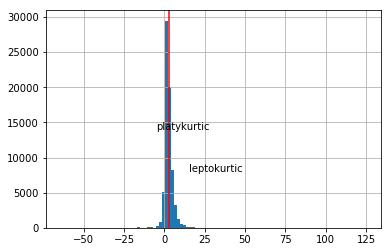

In [693]:
merged['kurtosis'].hist(bins=100)
plt.axvline(3, color='r')
plt.text(15, 8000, 'leptokurtic')
plt.text(-5, 14000,'platykurtic')

In [694]:
merged['skew'].describe()

count    69965.000000
mean         0.034662
std          1.000000
min        -16.694023
25%         -0.063440
50%          0.000000
75%          0.066207
max         54.791356
Name: skew, dtype: float64

### How do your pre-post earnings price time series from the previous section look as a function of conditioning on different values of the surprise metrics (and distribution metrics) above?

In [695]:
#This part need to combine with previous work

# Train Predictive Models

## Stylized surprise metrics dataset

### You will use as input the different metrics of the analyst distribution and its surprise metrics that you calculated for every earnings event in the previous section. As output variable you will use a categorical variable y which is 1 every time the 10-day post-earnings stock return is in the top 10% or bottom 10% for the given quarter.

In [696]:
#read daily price file
df_prc_dist=pd.read_csv("../AFE_data/df_prc_dist.csv")
#set year
df_prc_dist['year'] = df_prc_dist['ANNDATS'].apply(lambda x: str(x)[:4])


In [697]:
#Build the new dataset to calculate the 10 days return
df_prc_dist['delta_return']=df_prc_dist['10']-df_prc_dist['0']
df_prc_dist1=df_prc_dist[['delta_return','TICKER','quarternum','year']]
df_prc_dist1.head()

,delta_return,TICKER,quarternum,year
0,NaN,AA,1,1983
1,37.00,AA,2,1983
2,40.25,AA,3,1983
3,39.50,AA,0,1984
4,NaN,AA,1,1984


In [726]:
#Build stylized surprise metrics dataset
suprised_df = pd.DataFrame()
suprised_df['surprise_median_fa']=merged['surprise_median_fa']
suprised_df['surprise_mean_fa']=merged['surprise_mean_fa']
suprised_df['TICKER']=merged['TICKER']
suprised_df['year']=merged['year']
suprised_df['quarternum']=merged['quarternum']
suprised_df['Skew']=merged['skew']
suprised_df['Kurtosis']=merged['kurtosis']
suprised_df1 = pd.merge(suprised_df,df_prc_dist1,how = 'inner', on = ['TICKER','quarternum','year'])
suprised_df1.index = suprised_df1[['TICKER', 'year','quarternum']]


In [727]:
suprised_df1_q0=suprised_df1.loc[suprised_df1['quarternum'] == 0]
suprised_df1_q1=suprised_df1.loc[suprised_df1['quarternum'] == 1]
suprised_df1_q2=suprised_df1.loc[suprised_df1['quarternum'] == 2]
suprised_df1_q3=suprised_df1.loc[suprised_df1['quarternum'] == 3]

In [728]:
suprised_df1_q0=suprised_df1_q0.sort_values(["delta_return"],ascending=True)
bottom10_q0=suprised_df1_q0["delta_return"].quantile(0.1)
top10_q0=suprised_df1_q0["delta_return"].quantile(0.9)


In [729]:
print(bottom10_q0)
print(top10_q0)

15.73
70.37


In [730]:
suprised_df1_q0['Y'] = np.where((suprised_df1_q0['delta_return']>=70.37)|(suprised_df1_q0['delta_return']<=15.73), '1', '0')

In [731]:
suprised_df1_q1=suprised_df1_q1.sort_values(["delta_return"],ascending=True)
bottom10_q1=suprised_df1_q1["delta_return"].quantile(0.1)
top10_q1=suprised_df1_q1["delta_return"].quantile(0.9)


In [732]:
print(bottom10_q1)
print(top10_q1)

20.875
80.3125


In [733]:
suprised_df1_q1['Y'] = np.where((suprised_df1_q1['delta_return']>=80.315)|(suprised_df1_q1['delta_return']<=20.875), '1', '0')


In [734]:
suprised_df1_q2=suprised_df1_q2.sort_values(["delta_return"],ascending=True)
bottom10_q2=suprised_df1_q2["delta_return"].quantile(0.1)
top10_q2=suprised_df1_q2["delta_return"].quantile(0.9)

In [735]:
print(bottom10_q2)
print(top10_q2)

19.86
106.16


In [736]:
suprised_df1_q2['Y'] = np.where((suprised_df1_q2['delta_return']>=106.16)|(suprised_df1_q2['delta_return']<=19.86), '1', '0')

In [737]:
suprised_df1_q3=suprised_df1_q3.sort_values(["delta_return"],ascending=True)
bottom10_q3=suprised_df1_q3["delta_return"].quantile(0.1)
top10_q3=suprised_df1_q3["delta_return"].quantile(0.9)

In [738]:
print(bottom10_q3)
print(top10_q3)

16.14
98.18


In [739]:
suprised_df1_q3['Y'] = np.where((suprised_df1_q3['delta_return']>=98.18)|(suprised_df1_q3['delta_return']<=16.14), '1', '0')


In [741]:
suprised_df1_new = pd.concat([suprised_df1_q0, suprised_df1_q1, suprised_df1_q2, suprised_df1_q3], axis=0)
suprised_df1_new.head()

,surprise_median_fa,surprise_mean_fa,TICKER,year,quarternum,Skew,Kurtosis,delta_return,Y
"(AMCC, 2004, 0)",NaN,NaN,AMCC,2004,0,0.000000,-0.44,6.31,1
"(SVU, 2011, 0)",5.509348,5.519855,SVU,2011,0,-0.004349,1.45,6.33,1
"(SVU, 2011, 0)",5.509348,5.519855,SVU,2011,0,-0.004349,1.45,6.33,1
"(SVU, 2011, 0)",5.509348,5.519855,SVU,2011,0,-0.004349,1.45,6.33,1
"(SVU, 2011, 0)",5.509348,5.519855,SVU,2011,0,-0.004349,1.45,6.33,1


## Full distribution dataset. 

○	Your input features are 
■	The relative proportions of number analysts in each of the 10 quantiles of the forecast distribution. The sum of these proportions should be 1
■	The total number of analysts in this distribution
■	The standard deviation of this distribution
■	The full range of the distribution, e.g the max_forecast-min_forecast
■	The actual earning announcement value
○	The output feature y is again 1 every time the 10-day post-earnings stock return is in the top 10% or bottom 10% of the given quarter.


In [588]:
superised_df2=merged

In [ ]:
del superised_df2['skew']
del superised_df2['kurtosis']
del superised_df2['surprise_median_fa']
del superised_df2['surprise_mean_fa']
del superised_df2['ANNDATS_y']
del superised_df2['delta_mm']
del superised_df2['meadian']
del superised_df2['mean']
#del superised_df2['std']
del superised_df2['ANNDATS_x']

In [590]:
# The total number of analysts in this distribution
superised_df2['Analyst_Counts'] = superised_df2.groupby(superised_df2.index)['analyst'].transform('count')

In [592]:
# The total number of analysts in this distribution
superised_df2.head()

,TICKER,quarternum,analyst,forecast_value,year,earn_value,Analyst_Counts,std
"(AA, 1996, 3)",AA,3,3700,4.3125,1996,0.5775,3,0.602728
"(AA, 1996, 3)",AA,3,281,4.1250,1996,0.5775,3,0.602728
"(AA, 1996, 3)",AA,3,4088,3.1875,1996,0.5775,3,0.602728
"(AA, 1997, 3)",AA,3,662,3.0000,1997,0.9375,3,0.478768
"(AA, 1997, 3)",AA,3,472,3.9375,1997,0.9375,3,0.478768


In [583]:
#The relative proportions of number analysts in each of the 10 quantiles of the forecast distribution. The sum of these proportions should be 1

#superised_df2["forecast_value"].quantile(0.1)


In [ ]:
#The standard deviation of this distribution
superised_df2['std']=superised_df2.groupby('index').forecast_value.std()

In [608]:
#The full range of the distribution, e.g the max_forecast-min_forecast 

superised_df2_mm=superised_df2.reset_index()
superised_df2['Max']=superised_df2_mm.groupby('index').forecast_value.max()
superised_df2['Min']=superised_df2_mm.groupby('index').forecast_value.min()
superised_df2['the max_forecast-min_forecast']=(superised_df2['Max']-superised_df2['Min'])
#del superised_df2['Max']
#del superised_df2['Min']

In [616]:
# superised_df2

,TICKER,quarternum,analyst,forecast_value,year,earn_value,Analyst_Counts,std,the max_forecast-min_forecast
"(AA, 1996, 3)",AA,3,3700,4.3125,1996,0.5775,3,0.602728,1.1250
"(AA, 1996, 3)",AA,3,281,4.1250,1996,0.5775,3,0.602728,1.1250
"(AA, 1996, 3)",AA,3,4088,3.1875,1996,0.5775,3,0.602728,1.1250
"(AA, 1997, 3)",AA,3,662,3.0000,1997,0.9375,3,0.478768,0.9375
"(AA, 1997, 3)",AA,3,472,3.9375,1997,0.9375,3,0.478768,0.9375
"(AA, 1997, 3)",AA,3,281,3.3000,1997,0.9375,3,0.478768,0.9375
"(AA, 1998, 3)",AA,3,478,3.1275,1998,0.9075,5,1.504555,4.2000
"(AA, 1998, 3)",AA,3,18096,3.2625,1998,0.9075,5,1.504555,4.2000
"(AA, 1998, 3)",AA,3,17860,3.1200,1998,0.9075,5,1.504555,4.2000
"(AA, 1998, 3)",AA,3,281,5.7000,1998,0.9075,5,1.504555,4.2000
